In [ ]:
## 1. Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data acquisition

In [ ]:
df = pd.read_csv('news_articles.csv')
df.head()


,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [ ]:
df.tail()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
2091,-NO AUTHOR-,2016-10-27T15:36:10.573+03:00,teens walk free after gangrape conviction,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/hillary_haunt...,bias,Real,good samaritan wearing indian headdress disarm...,NaN,1.0
2092,-NO AUTHOR-,2016-10-27T15:36:10.671+03:00,school named for munichmassacre mastermind,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/rambo_richard...,bias,Real,skype sex scam fortune built shame,NaN,1.0
2093,-NO AUTHOR-,2016-10-27T13:30:00.000+03:00,russia unveils satan missile,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/skype_sex_sca...,bs,Fake,cannabis aficionados develop thca crystalline ...,NaN,1.0
2094,-NO AUTHOR-,2016-10-27T15:58:41.935+03:00,check out hillarythemed haunted house,NaN,english,wnd.com,http://worldtruth.tv/wp-content/uploads/2016/1...,bs,Fake,title,NaN,0.0
2095,Eddy Lavine,2016-10-28T01:02:00.000+03:00,cannabis aficionados develop thca crystalline ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2096 non-null   object 
 1   published                2096 non-null   object 
 2   title                    2096 non-null   object 
 3   text                     2050 non-null   object 
 4   language                 2095 non-null   object 
 5   site_url                 2095 non-null   object 
 6   main_img_url             2095 non-null   object 
 7   type                     2095 non-null   object 
 8   label                    2095 non-null   object 
 9   title_without_stopwords  2094 non-null   object 
 10  text_without_stopwords   2046 non-null   object 
 11  hasImage                 2095 non-null   float64
dtypes: float64(1), object(11)
memory usage: 196.6+ KB


In [ ]:
df.isnull().sum()


author                      0
published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     50
hasImage                    1
dtype: int64

# Data Cleaning

In [ ]:
#delete the row where the label column has null value

df = df.dropna(subset=['label'])

In [ ]:
# find how many rows have null value in text column and is "Fake" in label column

df.loc[(df['text'].isnull()) & (df['label'] == 'Real')].shape[0]

43

In [ ]:
#delete rows with null values in text

df = df.dropna(subset=['text'])
df.isnull().sum()

author                     0
published                  0
title                      0
text                       0
language                   0
site_url                   0
main_img_url               0
type                       0
label                      0
title_without_stopwords    1
text_without_stopwords     4
hasImage                   0
dtype: int64

# EDA

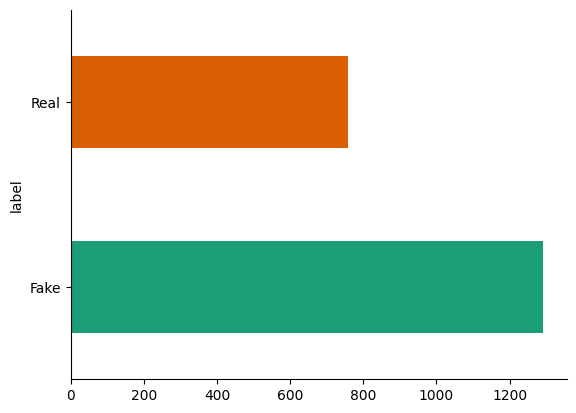

In [ ]:
#distribution of real or fake news

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

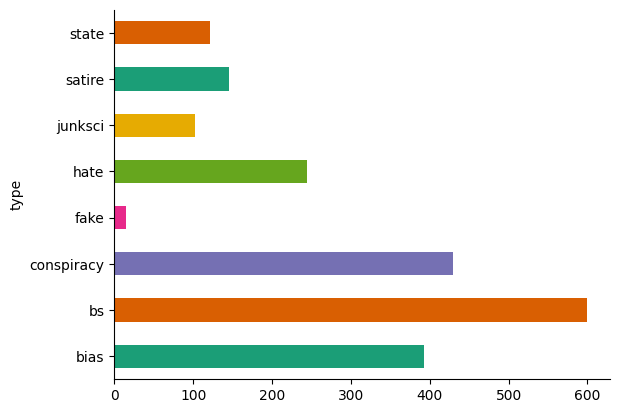

In [ ]:
#distribution of the news types

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

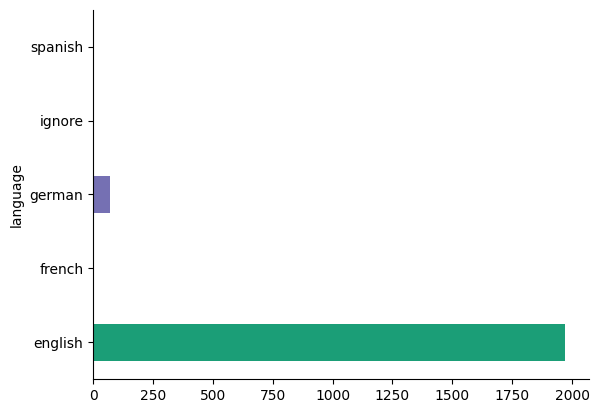

In [ ]:
#distribution of the news languages
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('language').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

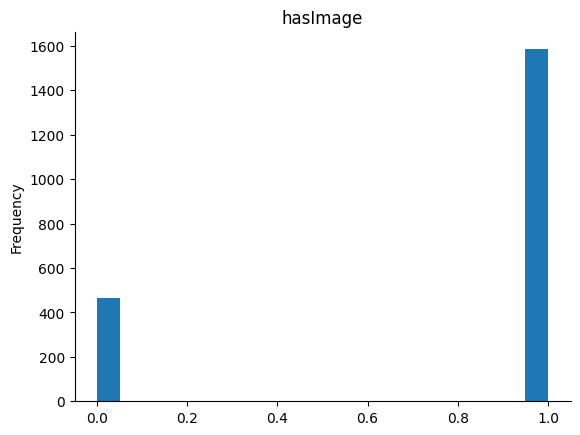

In [ ]:
#distribution of whether the news has images

from matplotlib import pyplot as plt
df['hasImage'].plot(kind='hist', bins=20, title='hasImage')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#see which authors tend to publish fake news
df.loc[df.label == "Fake"].author.value_counts()

No Author                              329
Activist Post                           82
noreply@blogger.com (Der Postillon)     72
Anonymous                               58
admin                                   48
                                      ... 
Paulus                                   1
Ann Tenna                                1
David Risselada                          1
Theodore Shoebat                         1
Old_Logan                                1
Name: author, Length: 302, dtype: int64

In [ ]:
#see which authors tend to publish real news
df.loc[df.label == "Real"].author.value_counts()

No Author                                                            176
EdJenner                                                              73
Daniel Greenfield                                                     53
Jason Easley                                                          45
Dr. Patrick Slattery                                                  36
                                                                    ... 
Aaron Clarey                                                           1
4 Goals For The Neomasculinity Movement During Trumps First Term      1
Brock Robinson                                                         1
Matt Forney                                                            1
Leo Hohmann                                                            1
Name: author, Length: 196, dtype: int64

In [ ]:
#see which url links tend to publish fake news
df.loc[df.label == "Fake"].site_url.value_counts()

activistpost.com                  100
infowars.com                      100
awdnews.com                       100
naturalnews.com                   100
clickhole.com                     100
prisonplanet.com                   99
abeldanger.net                     82
der-postillon.com                  72
ahtribune.com                      68
abovetopsecret.com                 53
legorafi.fr                        46
amtvmedia.com                      44
amren.com                          40
dcclothesline.com                  37
corbettreport.com                  28
fromthetrenchesworldreport.com     28
21stcenturywire.com                24
thefreethoughtproject.com          17
dennismichaellynch.com             16
departed.co                        14
adobochronicles.com                13
shiftfrequency.com                 11
whatreallyhappened.com             10
darkmoon.me                         9
theeconomiccollapseblog.com         8
davidstockmanscontracorner.com      7
thedailyshee

In [ ]:
#see which url links tend to publish real news
df.loc[df.label == "Real"].site_url.value_counts()

politicususa.com                  100
presstv.ir                         99
returnofkings.com                  99
frontpagemag.com                   99
westernjournalism.com              98
dailywire.com                      81
wnd.com                            55
davidduke.com                      44
100percentfedup.com                33
presstv.com                        21
addictinginfo.org                  20
washingtonsblog.com                 2
whydontyoutrythis.com               2
newstarget.com                      1
prisonplanet.com                    1
proudemocrat.com                    1
redstatewatcher.com                 1
fromthetrenchesworldreport.com      1
Name: site_url, dtype: int64

# Data preprocessing

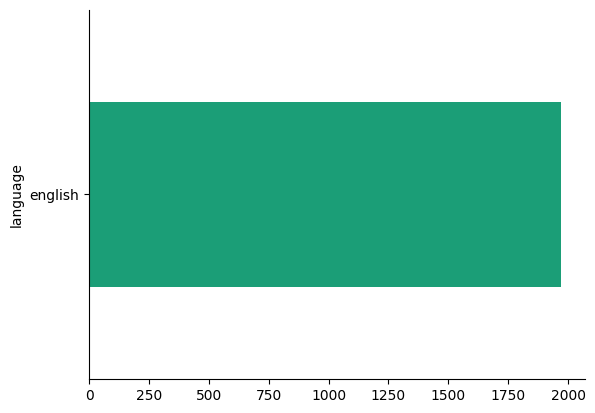

In [ ]:
#only kepp rows where the language is english

df = df[df['language'] == 'english']

df.groupby('language').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#using label encoding, label the data in label column to make it 0 for "fake" and 1 for "real"

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
df.head()


,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,1,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,1,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,1,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,1,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,1,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [ ]:
# prompt: using nltk, create a function to remove stopwords and clean the text data in text column

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def clean_text(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  filtered_text = [word for word in words if word.lower() not in stop_words]
  return ' '.join(filtered_text)

df['text'] = df['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Feature Engineering

In [ ]:
target = df.label
features = df[['author','site_url','text',"title"]]

In [ ]:
features['combined_text'] = features["author"]+" "+features["site_url"] + " " + features["text"]+" "+features["title"]
features.drop(['author','site_url', 'text',"title"], axis = 1, inplace = True)
features=features.combined_text

<ipython-input-21-98e5e4b2ed77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['combined_text'] = features["author"]+" "+features["site_url"] + " " + features["text"]+" "+features["title"]
<ipython-input-21-98e5e4b2ed77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.drop(['author','site_url', 'text',"title"], axis = 1, inplace = True)


In [ ]:
features

0       Barracuda Brigade 100percentfedup.com print pa...
1       reasoning with facts 100percentfedup.com attor...
2       Barracuda Brigade 100percentfedup.com red stat...
3       Fed Up 100percentfedup.com email kayla mueller...
4       Fed Up 100percentfedup.com email healthcare re...
                              ...                        
2045    Larry Elder wnd.com check hillarythemed haunte...
2046    -NO AUTHOR- wnd.com good samaritan wearing ind...
2047    Jerome R. Corsi wnd.com skype sex scam fortune...
2048    Leo Hohmann wnd.com posted eddie skyhigh poten...
2049    -NO AUTHOR- wnd.com billion even known keeping...
Name: combined_text, Length: 1972, dtype: object

# Modelling

In [ ]:
#using the Vectorizer before doing the classification
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.20)

vectorizer = TfidfVectorizer()
transformed_train = vectorizer.fit_transform(X_train)
transformed_test = vectorizer.transform(X_test)


Ariel SVM

In [ ]:
# Ariel SVM

from sklearn.svm import SVC
classifier = SVC(kernel='linear', C=10, random_state=0)
classifier.fit(transformed_train, y_train)

SVC(C=10, kernel='linear', random_state=0)

In [ ]:
# prompt: evaluate the model accuracy

y_pred = classifier.predict(transformed_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy * 100, "%")


Accuracy: 89.1139240506329 %


In [ ]:
# prompt: create the confusion matrix

from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)


[[243  13]
 [ 30 109]]


In [ ]:
# prompt: now i want to do the classification report

from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.89      0.95      0.92       256
           1       0.89      0.78      0.84       139

    accuracy                           0.89       395
   macro avg       0.89      0.87      0.88       395
weighted avg       0.89      0.89      0.89       395



Nathaniel Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Training the Naive Bayes classifier
nb_classifier = MultinomialNB(alpha=0.1)
nb_classifier.fit(transformed_train, y_train)

# Predictions
predictions = nb_classifier.predict(transformed_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.830379746835443
Confusion Matrix:
 [[244  12]
 [ 55  84]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88       256
           1       0.88      0.60      0.71       139

    accuracy                           0.83       395
   macro avg       0.85      0.78      0.80       395
weighted avg       0.84      0.83      0.82       395



Bernard

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier object
tree = DecisionTreeClassifier(criterion="entropy", max_depth=10)

# Train the model on the training data
tree.fit(transformed_train, y_train)

# Evaluate model performance
y_preds = tree.predict(transformed_test)
accuracy = accuracy_score(y_test, y_preds)
print("Accuracy:", accuracy * 100, "%")

Accuracy: 99.24050632911391 %


In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_preds)

# Print the confusion matrix
print(cm)

[[254   2]
 [  1 138]]


In [ ]:
# Generate the classification report
report = classification_report(y_test, y_preds)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       256
           1       0.99      0.99      0.99       139

    accuracy                           0.99       395
   macro avg       0.99      0.99      0.99       395
weighted avg       0.99      0.99      0.99       395



>1, train: 0.673, test: 0.696
>2, train: 0.728, test: 0.732
>3, train: 0.780, test: 0.770
>4, train: 0.831, test: 0.820
>5, train: 0.879, test: 0.871
>6, train: 0.918, test: 0.927
>7, train: 0.940, test: 0.959
>8, train: 0.967, test: 0.965
>9, train: 0.985, test: 0.987
>10, train: 0.996, test: 0.990
>11, train: 0.996, test: 0.995
>12, train: 0.997, test: 0.982
>13, train: 0.999, test: 0.992
>14, train: 0.999, test: 0.985
>15, train: 1.000, test: 0.985
>16, train: 1.000, test: 0.990
>17, train: 1.000, test: 0.980
>18, train: 1.000, test: 0.990
>19, train: 1.000, test: 0.987
>20, train: 1.000, test: 0.987


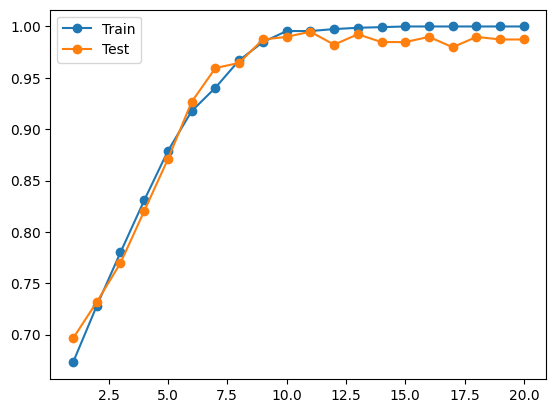

In [ ]:
# evaluate decision tree performance on train and test sets with different tree depths
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot


train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(criterion = "entropy", max_depth=i)
	# fit model on the training dataset
	model.fit(transformed_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(transformed_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(transformed_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

# Testing

In [ ]:
df.iloc[2]['text']


'red state fox news sunday reported morning anthony weiner cooperating fbi reopened yes lefties reopened investigation hillary clintons classified emails watch chris wallace reports breaking news panel segment near end show news breaking air colleague bret baier sent us email saying two sources say anthony weiner also coownership laptop estranged wife huma abedin cooperating fbi investigation given laptop therefore didnt need warrant get see contents said laptop pretty interesting development targets federal investigations often cooperate hoping get consideration judge sentencing given weiners wellknown penchant lying hard believe prosecutor would give weiner deal based agreement testify unless testimony strongly corroborated hard evidence cooperation take many forms wallace indicated mornings show one forms could signing consent form allow contents devices could probably get warrant anyway well see weiners cooperation extends beyond related'

In [ ]:
def predict_fake_news(news_article):
    # Vectorize the user input using the previously fitted TF-IDF vectorizer
    vectorized_input = vectorizer.transform([news_article])
    # Use the trained Naive Bayes classifier to predict
    prediction = nb_classifier.predict(vectorized_input)
    # Convert the prediction back to a label
    return 'Real' if prediction[0] == 1 else 'Fake'

# Example usage
author_input = input("Enter a news article's author: ")
text_input = input("Enter a news article's text: ")
user_input = " ".join([author_input, text_input])
prediction = predict_fake_news(user_input)
print(f"The predicted classification is: {prediction}")

Enter a news article's author: Barracuda Brigade
Enter a news article's text: red state fox news sunday reported morning anthony weiner cooperating fbi reopened yes lefties reopened investigation hillary clintons classified emails watch chris wallace reports breaking news panel segment near end show news breaking air colleague bret baier sent us email saying two sources say anthony weiner also coownership laptop estranged wife huma abedin cooperating fbi investigation given laptop therefore didnt need warrant get see contents said laptop pretty interesting development targets federal investigations often cooperate hoping get consideration judge sentencing given weiners wellknown penchant lying hard believe prosecutor would give weiner deal based agreement testify unless testimony strongly corroborated hard evidence cooperation take many forms wallace indicated mornings show one forms could signing consent form allow contents devices could probably get warrant anyway well see weiners co